In [2]:
# Imports
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

In [4]:
# Import sentences
original_data = pd.read_csv("../data/mturk_experiment_2.csv",encoding='unicode_escape')
data = original_data["Sentence"]
data

0       10In High Bay 4 of the Vehicle Assembly Buildi...
1       12The oxygen vent arm and hood removed from th...
2       13In the Rotation, Processing and Surge Facili...
3       14In the Vehicle Assembly Building's High Bay ...
4       15In the Vehicle Assembly Building's High Bay ...
                              ...                        
7027                                Let's hope it's true.
7028                     Cheer up, Sony (NYSE: SNE) fans.
7029    Wired is one of the few publications that acts...
7030    As NewsBusters reported Friday, conservative t...
7031                Pumpkins from Simon Willcox on Vimeo.
Name: Sentence, Length: 7032, dtype: object

In [5]:
# TF-IDF vectorise
vectoriser = TfidfVectorizer()
vector = vectoriser.fit_transform(data)

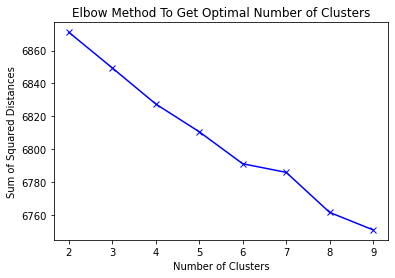

In [96]:
# Elbow method to get optimal number of clusters
distances = []
proposed_n = range(2,10)

for n in proposed_n:
    km = KMeans(n_clusters=n, max_iter=200,n_init=10)
    km = km.fit(vector)
    distances.append(km.inertia_)

plt.plot(proposed_n,distances,'bx-')
plt.xlabel("Number of Clusters")
plt.ylabel("Sum of Squared Distances")
plt.title("Elbow Method To Get Optimal Number of Clusters")
plt.show()

In [6]:
# Perform KMeans clustering
k = 5
model = KMeans(n_clusters=k,init='k-means++',max_iter=200,n_init=10)
model.fit(vector)

KMeans(max_iter=200, n_clusters=5)

In [98]:
labels = model.labels_.tolist()
clustered = pd.DataFrame()
clustered["Cluster"] = labels
clustered["Formality"] = original_data["Formality"]
clustered["Sentence"] = data
clustered

,Cluster,Formality,Sentence
0,3,6.2,10In High Bay 4 of the Vehicle Assembly Buildi...
1,3,6.0,12The oxygen vent arm and hood removed from th...
2,3,5.8,"13In the Rotation, Processing and Surge Facili..."
3,3,5.2,14In the Vehicle Assembly Building's High Bay ...
4,0,4.6,15In the Vehicle Assembly Building's High Bay ...
...,...,...,...
7027,1,2.6,Let's hope it's true.
7028,0,1.8,"Cheer up, Sony (NYSE: SNE) fans."
7029,3,5.4,Wired is one of the few publications that acts...
7030,0,5.2,"As NewsBusters reported Friday, conservative t..."
